In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1

In [2]:
d = np.array([10, 20, 30, 40, 50])
p_d = np.array([.1, .15, .3, .25, .2])
cost = 10
retail = 15
discount = 5
prd = cvx.Variable()
y = cvx.Variable((5,))
s = cvx.Variable((5,))

cons = [prd >=0, prd <= 75, y + s <= prd, y >=0, s>=0, y <= d]
obj = cvx.Minimize(cvx.sum(cvx.multiply(p_d, 
                                         prd * cost - (y*retail + s*(discount)))))

problem = cvx.Problem(obj, cons)

problem.solve()

print('Solution Expected Profit: ', problem.value)
print('Solution Production: ', prd.value)
print('Solution Retail Plan: ', y.value)
print('Solution Salvage Plan: ', s.value)

Solution Expected Profit:  -115.0
Solution Production:  30.0
Solution Retail Plan:  [ 10.  20.  30.  30.  30.]
Solution Salvage Plan:  [  2.00000000e+01   1.00000000e+01  -2.37310172e-21   4.99600364e-22
   4.71844788e-22]


# Problem 2

x

## a)

Yes. The interior function is linear as is the absolute value function. Compositions of convex functions are convex if the interior function is linear, so the absolute value and interior function together are convex. Finally, non-negative sums of convex functions are convex, so summing over our data rows is also convex.  

## b)

$min \sum_{i=1}^N z_i$  
$s.t.\ y_i - b_0 - \sum_{j=1}^M b_j x_{ij} \leq z_i\ \ \forall i<=N \\
\quad \ \ y_i - b_0 - \sum_{j=1}^M b_j x_{ij} \geq -z_i\ \ \forall i<=N$

## c)  

I preprocessed x and y due to the weird format. The code reads the processed data files. 

In [3]:
x = np.load('clean_x.npy')
# Just prepending the bias as an extra column to make the computation cleaner
X = np.hstack([np.ones((x.shape[0], 1)), x])
y = np.load('clean_y.npy')

b = cvx.Variable(3)
z = cvx.Variable(x.shape[0])

cons = [X*b - y <= z,
       X*b - y >= -z]
obj = cvx.Minimize(cvx.sum(z))
prob = cvx.Problem(obj, cons)
prob.solve()

print('Min Value: ', prob.value)
print('Optimal Coefficients:', b.value)

Min Value:  26.5180350068
Optimal Coefficients: [ 0.40418996  0.18413888 -0.19966582]


## d)

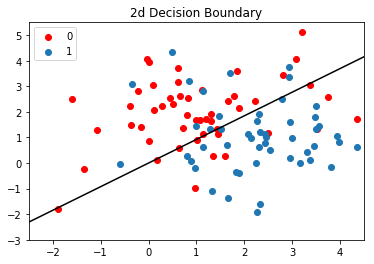

In [4]:
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], color = 'red', label = '0')
plt.scatter(X[:, 1][y==1], X[:, 1][y==0], label = '1')

# Ignoring the intercept here since 3D graphs rarely look good
w = b.value
a = -w[1] / w[2]
xx = np.linspace(-5, 5)
yy = a * xx
plt.plot(xx, yy, 'k-')
plt.xlim(xmin = -2.5, xmax = 4.5)
plt.ylim(ymin = -3, ymax = 5.5)
plt.legend()
plt.title('2d Decision Boundary')